# 파이토치(PyTorch)

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuUgoV%2FbtqwWZvcHHX%2Fd6XzIFBEfiuFb0UvyV4A50%2Fimg.jpg" width="300">

- 코드 출처: https://pytorch.org/tutorials/

<br>

<br>



## 파이토치의 구성요소

#### `torch`: 텐서를 생성하는 라이브러리

#### `torch.autograd`: 자동미분 기능을 제공하는 라이브러리

#### `torch.nn`: 신경망을 생성하는 라이브러리

#### `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리

#### `torch.utils`: 데이터 조작 등 유틸리티 기능 제공

#### `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드

#### `torch.onnx`: ONNX(Open Neural Network Exchange)

  - **서로 다른 프레임워크 간의 모델을 공유할 때 사용**

<br>

<br>

## 텐서(Tensors)
- 넘파이(NumPy)의 ndarray와 유사

- GPU를 사용한 연산 가속도 가능

In [1]:
import torch

In [2]:
torch.__version__

'2.0.1+cu118'

<br>

### 초기화 되지 않은 행렬 

<br>

#### `torch.empty()`

In [5]:
torch.empty(4, 2)

tensor([[-1.9713e+29,  4.5794e-41],
        [ 1.3457e-34,  0.0000e+00],
        [ 1.4013e-45,  0.0000e+00],
        [ 1.3332e-34,  0.0000e+00]])

<br>

### 무작위로 초기화된 행렬

<br>

#### `torch.rand()`

In [4]:
torch.rand(4, 2)

tensor([[0.0641, 0.4534],
        [0.8961, 0.2642],
        [0.0032, 0.1693],
        [0.1821, 0.7098]])

<br>

### dtype이 long, 0으로 채워진 텐서

<br>

#### `torch.zeros(shape, dtype)`

In [6]:
torch.zeros(4, 2, dtype=torch.long)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

<br>

#### `torch.tensor(data)`

In [7]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


<br>

#### `torch텐서.new_ones(shape, dtype)` : 데이터 차원 변경 및 값을 1로 채움

In [8]:
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


<br>

#### `torch.randn_like(tensor, dtype)` : `tensor`의 차원을 가지고, 임의의 수로 차있는 텐서 생성

In [9]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-0.6335,  0.1408,  0.1145, -0.0178],
        [-1.2338, -1.3202,  1.2840,  0.6760]])


<br>

### 텐서의 크기

<br>

#### `torch텐서.size()`

In [10]:
print(x.size())

torch.Size([2, 4])


<br>

<br>

## 텐서의 연산(operations)

<br>

### 덧셈 1

In [13]:
print(x)
print(y)

tensor([[-0.6335,  0.1408,  0.1145, -0.0178],
        [-1.2338, -1.3202,  1.2840,  0.6760]])
tensor([[0.5862, 0.6049, 0.2782, 0.1904],
        [0.6093, 0.5811, 0.4888, 0.6985]])


In [12]:
y = torch.rand(2, 4)
print(x + y)

tensor([[-0.0473,  0.7457,  0.3927,  0.1725],
        [-0.6245, -0.7390,  1.7728,  1.3745]])


<br>

### 덧셈2

In [14]:
print(torch.add(x, y))

tensor([[-0.0473,  0.7457,  0.3927,  0.1725],
        [-0.6245, -0.7390,  1.7728,  1.3745]])


<br>

### 덧셈3
- 결과 텐서를 인자로 제공

In [15]:
result = torch.empty(2, 4)
torch.add(x, y, out=result)
print(result)

tensor([[-0.0473,  0.7457,  0.3927,  0.1725],
        [-0.6245, -0.7390,  1.7728,  1.3745]])


<br>

### 덧셈4
- `in-place` 방식

- (참고) **in-place 방식**
  - **in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음**
  - `x.copy_(y), x.t_()`

In [16]:
print(x)
print(y, end='\n\n')

y.add_(x)
print(y)

tensor([[-0.6335,  0.1408,  0.1145, -0.0178],
        [-1.2338, -1.3202,  1.2840,  0.6760]])
tensor([[0.5862, 0.6049, 0.2782, 0.1904],
        [0.6093, 0.5811, 0.4888, 0.6985]])

tensor([[-0.0473,  0.7457,  0.3927,  0.1725],
        [-0.6245, -0.7390,  1.7728,  1.3745]])


<br>

### 그 외의 연산
#### `torch.sub` : 뺄셈


In [18]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])

print(x - y, end='\n\n')
print(torch.sub(x, y), end='\n\n')
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])

tensor([[-1., -1.],
        [-1., -1.]])

tensor([[-1., -1.],
        [-1., -1.]])


<br>


#### `torch.mul` : 곱셉

In [20]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])

print(x * y, end='\n\n')
print(torch.mul(x, y), end='\n\n')
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 56.]])

tensor([[ 2., 12.],
        [30., 56.]])

tensor([[ 2., 12.],
        [30., 56.]])


<br>

#### `torch.div` : 나눗셈

In [21]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])

print(x / y, end='\n\n')
print(torch.div(x, y), end='\n\n')
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


<br>

#### `torch.mm` : 내적(dot product)

In [22]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])

print(torch.mm(x, y))

tensor([[20., 28.],
        [52., 76.]])


<br>

<br>

## 텐서의 조작(manipulations)

<br>

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [23]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [24]:
print(x[:, 1])

tensor([3., 7.])


<br>

### view
- 텐서의 크기(size)나 모양(shape)을 변경 **(= np.reshape())**

<br>

#### `torch텐서.view(shape)`

In [26]:
x = torch.randn(4, 5)
y = x.view(20)
z = x.view(5, -1)

print(x, end='\n\n')
print(y, end='\n\n')
print(z)

tensor([[-0.0997, -0.5963, -0.4539, -2.9228, -0.5184],
        [-0.6195, -0.0535,  0.5485, -0.4171,  2.9002],
        [ 0.6142,  0.8149, -1.0888,  0.0448,  2.0190],
        [-0.5313, -1.1880,  0.8415, -1.4245, -1.4572]])

tensor([-0.0997, -0.5963, -0.4539, -2.9228, -0.5184, -0.6195, -0.0535,  0.5485,
        -0.4171,  2.9002,  0.6142,  0.8149, -1.0888,  0.0448,  2.0190, -0.5313,
        -1.1880,  0.8415, -1.4245, -1.4572])

tensor([[-0.0997, -0.5963, -0.4539, -2.9228],
        [-0.5184, -0.6195, -0.0535,  0.5485],
        [-0.4171,  2.9002,  0.6142,  0.8149],
        [-1.0888,  0.0448,  2.0190, -0.5313],
        [-1.1880,  0.8415, -1.4245, -1.4572]])


<br>

### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [28]:
x = torch.randn(1)
print(x, end='\n\n')
print(x.item(), end='\n\n')
print(x.dtype)

tensor([0.3716])

0.3715788424015045

torch.float32


<br>

- **스칼라값 하나만 존재해야함 $→$ 1개보다 많을 시, error 발생**

In [29]:
x = torch.randn(2)
print(x, end='\n\n')
print(x.item(), end='\n\n')
print(x.dtype)

tensor([-0.5442, -0.1539])



RuntimeError: ignored

<br>

### squeeze 
- 차원을 축소(제거)

<br>

#### `torch텐서.squeeze()`

In [33]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.9312, 0.8537, 0.9057],
         [0.0878, 0.7024, 0.3632],
         [0.2889, 0.2776, 0.4123]]])
torch.Size([1, 3, 3])


In [32]:
t = tensor.squeeze()

print(t)
print(t.shape)

tensor([[[0.9789, 0.1769, 0.0075],
         [0.3149, 0.2147, 0.0209],
         [0.1117, 0.3976, 0.1844]]])
tensor([[0.9789, 0.1769, 0.0075],
        [0.3149, 0.2147, 0.0209],
        [0.1117, 0.3976, 0.1844]])
torch.Size([3, 3])


<br>

### unsqueeze
- 차원을 증가(생성)

<br>

#### `torch텐서.unsqueeze(dim)`

In [34]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.6483, 0.7372, 0.7523],
         [0.7456, 0.1243, 0.0058],
         [0.0817, 0.7080, 0.3603]]])
torch.Size([1, 3, 3])


In [36]:
t = tensor.unsqueeze(dim=0)

print(t)
print(t.shape)

tensor([[[[0.6483, 0.7372, 0.7523],
          [0.7456, 0.1243, 0.0058],
          [0.0817, 0.7080, 0.3603]]]])
torch.Size([1, 1, 3, 3])


<br>

### stack
- 텐서간 결합

<br>

#### `torch.stack(tensors)`

In [38]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


<br>

### cat
- **텐서를 결합하는 메소드(concatenate)**

- **넘파이의 `stack`과 유사하지만, 쌓을 dim이 존재해야함**
  - 예를 들어, 해당 차원을 늘려준 후 결합

<br>

#### `torch.cat(tensors, dim)`

In [43]:
a = torch.randn(1, 1, 3, 3)
b = torch.randn(1, 1, 3, 3)
c = torch.cat((a, b), dim=0)

print(c, end='\n\n')
print(c.size())

tensor([[[[ 0.5157,  0.7976, -1.0424],
          [ 0.0213, -0.3600,  0.2677],
          [ 0.7438, -0.1456, -0.5321]]],


        [[[-0.2706,  1.9276, -0.2324],
          [-2.7032,  0.4628,  0.5219],
          [ 0.5365, -1.3585,  0.3941]]]])

torch.Size([2, 1, 3, 3])


<br>

### chuck
- **텐서를 여러 개로 나눌 때 사용**


<br>

#### `torch.chuck(input, chunk, dim)`
- `chunk` : 몇 개의 텐서로 나눌 것이냐

In [45]:
tensor = torch.rand(3, 6)
t1, t2, t3 = torch.chunk(tensor, 3, dim=1)

print(tensor, end='\n\n')
print(t1, end='\n\n')
print(t2, end='\n\n')
print(t3, end='\n\n')

tensor([[0.2887, 0.5868, 0.2699, 0.2965, 0.5221, 0.2135],
        [0.7245, 0.7767, 0.6687, 0.7347, 0.7424, 0.9475],
        [0.8412, 0.9081, 0.4488, 0.4597, 0.7861, 0.2552]])

tensor([[0.2887, 0.5868],
        [0.7245, 0.7767],
        [0.8412, 0.9081]])

tensor([[0.2699, 0.2965],
        [0.6687, 0.7347],
        [0.4488, 0.4597]])

tensor([[0.5221, 0.2135],
        [0.7424, 0.9475],
        [0.7861, 0.2552]])



<br>

### split
- `chunck`와 동일한 기능이지만 조금 다름

<br>

#### `torch.split(tensor, split_size_or_sections, dim)`
- `split_size_or_selections` : 하나의 텐서당 크기가 얼마이냐

In [47]:
tensor = torch.rand(3, 6)
t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor, end='\n\n')
print(t1, end='\n\n')
print(t2)

tensor([[0.5195, 0.5916, 0.6306, 0.2265, 0.8604, 0.5986],
        [0.2324, 0.1210, 0.3105, 0.8244, 0.5589, 0.1624],
        [0.6798, 0.6826, 0.3798, 0.7342, 0.7140, 0.7167]])

tensor([[0.5195, 0.5916, 0.6306],
        [0.2324, 0.1210, 0.3105],
        [0.6798, 0.6826, 0.3798]])

tensor([[0.2265, 0.8604, 0.5986],
        [0.8244, 0.5589, 0.1624],
        [0.7342, 0.7140, 0.7167]])


<br>

### torch ↔ numpy
- **Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능**
<br>

#### `torch텐서.numpy()`


In [48]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [49]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


<br>


- (참고)
  - **Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함**

In [50]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


<br>

#### `torch.from_numpy()`

In [51]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


<br>

<br>

## CUDA Tensors

<br>


#### `.to` : 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
  - 예) cpu, gpu

In [52]:
import torch

In [53]:
x = torch.randn(1)

print(x)
print(x.item())
print(x.dtype)

tensor([-0.8691])
-0.8690943121910095
torch.float32


In [54]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

y = torch.ones_like(x, device=device)
x = x.to(device)
z = x + y

print(device)
print(z)
print(z.to('cpu', torch.double))

cuda
tensor([0.1309], device='cuda:0')
tensor([0.1309], dtype=torch.float64)


<br>

<br>

## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- **이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻**

- **backprop를 위한 미분값을 자동으로 계산**

<br>

### Tensor

- **`data`**: tensor형태의 데이터

- **`grad`**: data가 겨쳐온 layer에 대한 미분값 저장

In [55]:
import torch

<br>

- `requires_grad` 속성을 `True`로 설정하면, **해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작**

In [57]:
x = torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [58]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)



**`grad_fn`**: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)
- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

In [59]:
print(y.grad_fn)

In [60]:
z = y * y * 2
out = z.mean()

print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


<br>

- `requires_grad_(...)`는 기존 텐서의 `requires_grad`값을 바꿔치기(`in-place`)하여 변경

In [62]:
a = torch.randn(3, 3)
a = ((a * 3) / (a - 1))
print(a.requires_grad, '\n\n')

a.requires_grad_(True)
print(a.requires_grad, '\n\n')

b = (a * a).sum()
print(b.grad_fn)

False 


True 




- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

<br>

### 기울기(Gradient)
- **역전파: `.backward()`를 통해 역전파 계산 가능**

In [63]:
out.backward()

In [64]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [65]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
  y = y * 2

print(y)

tensor([-742.5122, -932.8862, -492.2561], grad_fn=<MulBackward0>)


In [66]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


<br>

- **`with torch.no_grad()`를 사용하여 gradient의 업데이트를 하지 않음**
  - 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

In [68]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
  print((x ** 2).requires_grad)

True
True
False


<br>

- **`detach()`: 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때**

  - 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

In [69]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


<br>

### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [70]:
import torch

In [71]:
a = torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [73]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


<br>

- **초기 선언시, `grad`와 `grad_fn`은 모두 `None`**

In [74]:
print("a.data:", a)
print("a.grad:", a.grad)
print("a.grad_fn:", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: None
a.grad_fn: None


<br>

- **덧셈연산은 `AddBackward`**
  - $b = a + 2$

In [75]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


<br>

- **제곱연산 (곱셈연산)은 `PowBackward`**

  - $c = b^2$ 

In [76]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


<br>

- **직전의 grad_fn 출력**

In [ ]:
out = c.sum()
print(out)

In [78]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


<br>

- **a의 `grad_fn`이 None인 이유** : a에 할당하여 직접적으로 계산한 부분이 없었기 때문

In [79]:
print("a.data:", a)
print("a.grad:", a.grad)
print("a.grad_fn:", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn: None


<br>

- **b에 할당하여 직접적으로 계산된 `grad_fn` 출력**

In [80]:
print("b.data:", b)
print("b.grad:", b.grad)
print("b.grad_fn:", b.grad_fn)

b.data: tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
b.grad: None
b.grad_fn: <AddBackward0 object at 0x7fa8d7d53c40>


<ipython-input-80-f88046268e86>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("b.grad:", b.grad)


In [81]:
print("c.data:", c)
print("c.grad:", c.grad)
print("c.grad_fn:", c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)
c.grad: None
c.grad_fn: <PowBackward0 object at 0x7fa8d7d502e0>


<ipython-input-81-f0d910db16fc>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("c.grad:", c.grad)


In [82]:
print("out.data:", out)
print("out.grad:", out.grad)
print("out.grad_fn:", out.grad_fn)

out.data: tensor(36., grad_fn=<SumBackward0>)
out.grad: None
out.grad_fn: <SumBackward0 object at 0x7fa8d7d50910>


<ipython-input-82-fabc4e338a08>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("out.grad:", out.grad)


<br>

### 자동 미분 흐름 다시 보기(2)
- `grad`값을 넣어서 `backward`

- 아래의 코드에서 `.grad`값이 None은 gradient값이 필요하지 않기 때문

In [83]:
x = torch.ones(3, requires_grad=True)
y = (x ** 2)
z = y ** 2 + x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [84]:
grad = torch.Tensor([0.1, 1, 100])
z.backward(grad)

In [85]:
print("x.data:", x)
print("x.grad:", x.grad)
print("x.grad_fn:", x.grad_fn)

x.data: tensor([1., 1., 1.], requires_grad=True)
x.grad: tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn: None


In [86]:
print("y.data:", y)
print("y.grad:", y.grad)
print("y.grad_fn:", y.grad_fn)

y.data: tensor([1., 1., 1.], grad_fn=<PowBackward0>)
y.grad: None
y.grad_fn: <PowBackward0 object at 0x7fa8d7d51c30>


<ipython-input-86-496e1d7e69be>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("y.grad:", y.grad)


In [88]:
print("z.data:", z)
print("z.grad:", z.grad)
print("z.grad_fn:", z.grad_fn)

z.data: tensor([2., 2., 2.], grad_fn=<AddBackward0>)
z.grad: None
z.grad_fn: <AddBackward0 object at 0x7fa8d7d503d0>


<ipython-input-88-3079e2e243c7>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("z.grad:", z.grad)


<br>

<br>

## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- **결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,**  
  **`torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능**
 


<br>

### nn 패키지

- **주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때** 
  - **따라서, `weight`값들을 직접 선언 안함**

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [89]:
import torch
import torch.nn as nn

<br>

- Convolution Layer 예시 (1)


In [95]:
m = nn.Conv2d(in_channels=16, out_channels=33, kernel_size=3, stride=2)

m = nn.Conv2d(in_channels=16, out_channels=33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2))

m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))

input = torch.randn(20, 16, 50, 100)
output = m(input)

In [92]:
output.shape

torch.Size([20, 33, 26, 100])

<br>

### nn.functional 패키지

- **가중치를 직접 선언하여 인자로 넣어줘야함**

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [96]:
import torch
import torch.nn.functional as F

<br>

- Convolution Layer 예시 (2)

In [97]:
filters = torch.randn(8, 4, 3, 3)

In [98]:
inputs = torch.randn(1, 4, 5, 5)
conv = F.conv2d(inputs, filters, padding=1)
conv.shape

torch.Size([1, 8, 5, 5])

<br>

<br>

## Torchvision
- **<u>전처리를 진행하는 객체를 생성하는 방식</u>**

- **`torchvision.transforms`: 전처리할 때 사용하는 메소드**

- **`torchvision.transforms`에서 제공하는 클래스 이외에일반적으로 클래스를 따로 만들어 전처리 단계를 진행** 
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/vision/stable/transforms.html


In [99]:
import torch
import torchvision
import torchvision.transforms as transforms

<br>

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - **`transforms.Compose`를 통해 리스트 안에 순서대로 전처리 진행**

    - **대표적인 예로, `ToTensor`()를 하는 이유는     <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함**

    - **(R의 Recipe Package)**

In [100]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5,), std=(0.5, ))])

<br>

<br>

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [101]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [102]:
trainset = torchvision.datasets.MNIST(root='/content',
                                      train=True,
                                      download=True,
                                      transform=transform)

testset = torchvision.datasets.MNIST(root='/content',
                                     train=False,
                                     download=True,
                                     transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 354789999.01it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 30058484.82it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 92437432.62it/s]


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22625331.08it/s]


Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [106]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

<br>

- **`batch_size`만큼 데이터를 하나씩 가져옴**

In [117]:
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

<br>

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

<br>

### 데이터 확인

In [118]:
import matplotlib.pyplot as plt

In [119]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [120]:
image = torch_image.numpy()
image.shape

(28, 28)

<br>

In [121]:
label = labels[0].numpy()
label.shape

()

In [122]:
label

array(6)

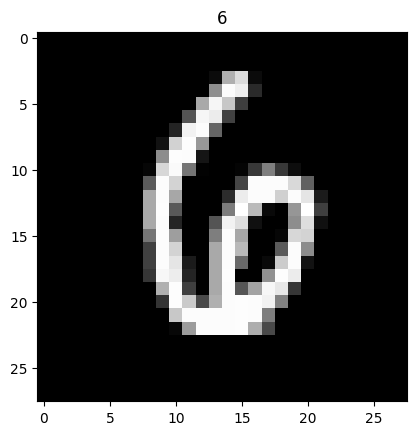

In [123]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

<br>

<br>

## 각 Layer 설명

In [125]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

<br>

### nn.Conv2d

<br>

#### `torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, dilation, ...)`

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [128]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [129]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

<br>

- `wegiht`확인

In [130]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

<br>

- **`weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능**

In [131]:
weight = weight.detach()

In [132]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

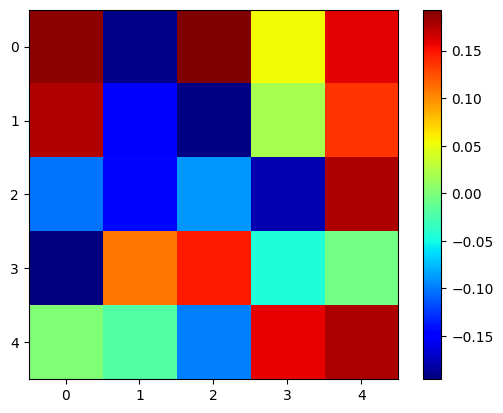

In [133]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [134]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [135]:
input_image = torch.unsqueeze(images[0], dim=0)

In [136]:
output_data = layer(input_image)

In [137]:
output = output_data.data

In [139]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

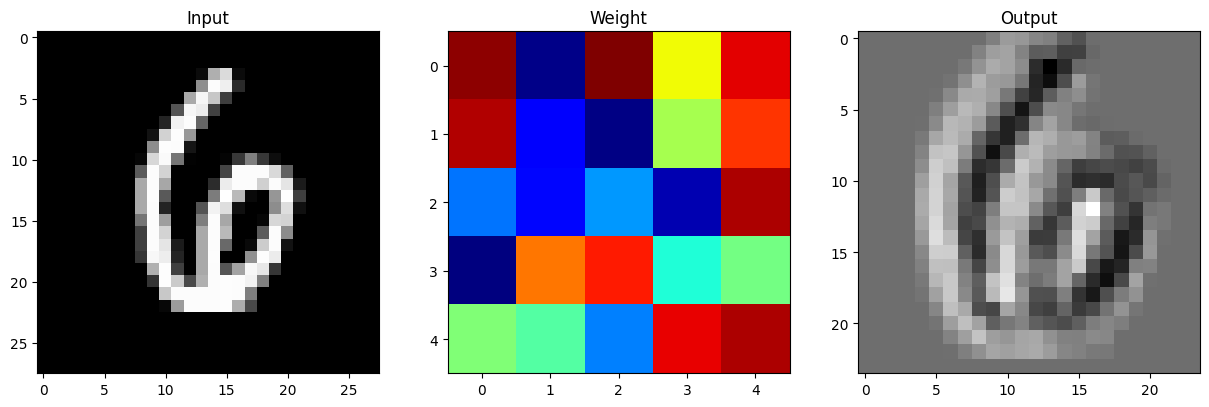

In [141]:
plt.figure(figsize=(15, 20))

plt.subplot(131)
plt.title("Input")
plt.imshow(image, 'gray')

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0, 0, :, :], 'jet')

plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0, 0, :, :], 'gray')
plt.show()

<br>

### Pooling

<br>


#### `torch.nn.functional.max_pool2d(input, kernel_size, stride, padding, dilation)` 
  - `stride`

  - `kernel_size`

- (`torch.nn.MaxPool2d` 도 많이 사용)

In [142]:
image.shape

(28, 28)

In [143]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

<br>

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [145]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

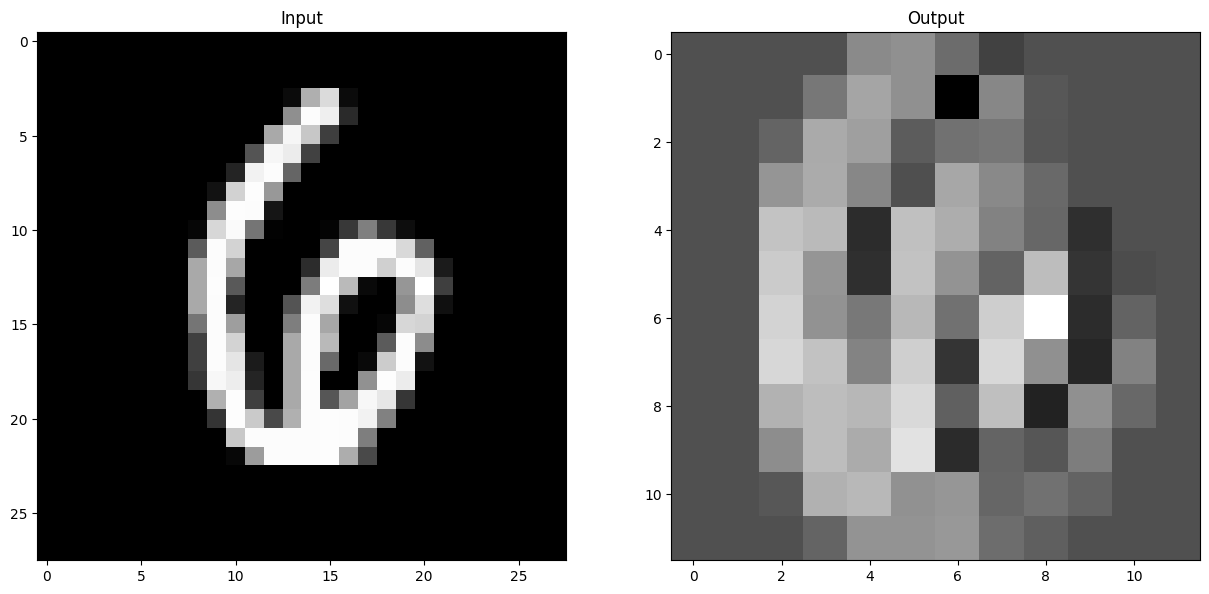

In [148]:
plt.figure(figsize=(15, 20))

plt.subplot(121)
plt.title("Input")
plt.imshow(image, 'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0, 0, :, :], 'gray')

plt.show()

<br>

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

<br>

#### `torch.nn.Linear(in_features, out_features, bias)`

In [149]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [150]:
flatten = image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [151]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [152]:
lin

tensor([[-1.0160, -0.6053, -0.6165, -0.6269,  0.4174, -0.1252, -0.0378, -0.3438,
          0.0672, -0.1558]], grad_fn=<AddmmBackward0>)

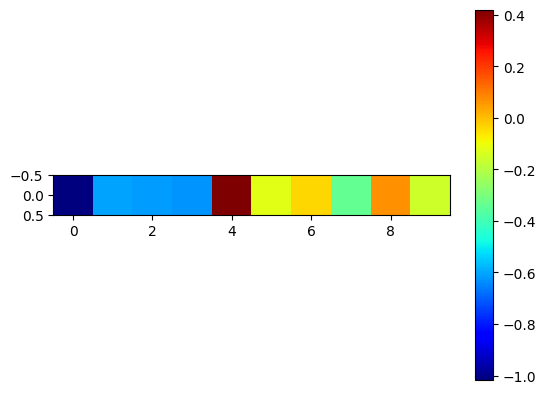

In [153]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

<br>

### Softmax

<br>

#### `torch.nn.functional.softmax(Tensor, dim)`


In [154]:
with torch.no_grad():
  flatten = image.view(1, 28 * 28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin, dim=1)

In [155]:
softmax

tensor([[0.0381, 0.0683, 0.0860, 0.0715, 0.1896, 0.1320, 0.0720, 0.1125, 0.1516,
         0.0785]])

In [156]:
np.sum(softmax.numpy())

1.0000001

<br>

### relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

<br>

#### `torch.nn.functional.relu(tensor)`

In [157]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [158]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

<br>

<br>

## Optimizer

<br>

#### `torch.optim as optim.Adam(params, lr, weight_decay)`
#### `torch.optim as optim.SGD(params, lr, momentum, weight_decay)`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  import torch.optim as optim

  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- **`.zero_grad()`로 초기화**
- **`.step()`으로 업데이트**

